# 2. Regressão

A regressão é uma técnica de aprendizado supervisionado voltada à **previsão de variáveis contínuas**. Seu objetivo é modelar a relação entre um vetor de atributos de entrada \( x \in \mathbb{R}^p \) e uma variável alvo \( y \in \mathbb{R} \).

---

## 2.1 Formulação do modelo

Um modelo de regressão linear simples pode ser expresso como:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p
$$

ou de forma matricial:

$$
\hat{\mathbf{y}} = X \boldsymbol{\beta}
$$

onde \( X \in \mathbb{R}^{n \times (p+1)} \) contém as amostras (com coluna de 1s para o intercepto) e \( \boldsymbol{\beta} \) representa os coeficientes do modelo.

---

## 2.2 Função de perda e Mínimos Quadrados Ordinários (OLS)

A regressão linear busca minimizar o **erro quadrático médio (MSE)**:

$$
J(\boldsymbol{\beta}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \| \mathbf{y} - X\boldsymbol{\beta} \|_2^2
$$

A solução analítica é obtida pela equação normal:

$$
\hat{\boldsymbol{\beta}} = (X^\top X)^{-1} X^\top \mathbf{y}
$$

Essa solução é válida quando \( X^\top X \) é inversível, ou seja, quando as colunas de \( X \) são linearmente independentes.

---

## 2.3 Gradiente Descendente

Em situações de grande número de atributos, utiliza-se o **gradiente descendente**, um método iterativo que ajusta os coeficientes em direção à minimização da função de perda:

$$
\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \eta \nabla J(\boldsymbol{\beta}^{(t)})
$$

O gradiente da função de perda é dado por:

$$
\nabla J(\boldsymbol{\beta}) = -\frac{2}{n} X^\top (\mathbf{y} - X\boldsymbol{\beta})
$$

onde \( \eta \) é a **taxa de aprendizado**. A padronização dos atributos costuma acelerar a convergência.

---

## 2.4 Hipóteses clássicas do modelo linear

Para que o modelo linear tenha boa interpretabilidade e validade estatística, assumem-se as seguintes hipóteses:

1. **Linearidade** entre variáveis preditoras e resposta.  
2. **Independência** dos erros.  
3. **Homoscedasticidade**: variância constante dos erros.  
4. **Normalidade** dos resíduos.  

A violação dessas suposições pode ser detectada por análises de resíduos, gráficos de dispersão e testes estatísticos.

---

## 2.5 Regularização

A regularização adiciona uma penalização sobre a magnitude dos coeficientes para reduzir o **overfitting** e lidar com **multicolinearidade**.

### Ridge (penalização \( L_2 \))

$$
J_{\text{ridge}}(\boldsymbol{\beta}) = \frac{1}{n} \| \mathbf{y} - X\boldsymbol{\beta} \|_2^2 + \lambda \| \boldsymbol{\beta} \|_2^2
$$

A solução é dada por:

$$
\hat{\boldsymbol{\beta}}_{\text{ridge}} = (X^\top X + \lambda I)^{-1} X^\top \mathbf{y}
$$

O termo \( \lambda \) controla a penalização. Quanto maior, menor a variância dos coeficientes.

### Lasso (penalização \( L_1 \))

$$
J_{\text{lasso}}(\boldsymbol{\beta}) = \frac{1}{n} \| \mathbf{y} - X\boldsymbol{\beta} \|_2^2 + \lambda \| \boldsymbol{\beta} \|_1
$$

O Lasso induz **esparsidade** em \( \boldsymbol{\beta} \), eliminando variáveis menos relevantes.

### Elastic Net

Combina as duas penalizações para equilibrar **seleção de variáveis (L1)** e **estabilidade (L2)**.

---

## 2.6 Regressão Polinomial e Expansões de Base

A regressão polinomial é um caso especial de expansão de base, que permite capturar relações não lineares entre os dados mantendo a linearidade nos parâmetros.

$$
\phi(x) = [1, x, x^2, \dots, x^d]
$$

O modelo torna-se:

$$
\hat{y} = \sum_{k=0}^{d} \beta_k x^k
$$

Valores altos de \( d \) aumentam a flexibilidade do modelo, mas também o risco de **overfitting**.

---

## 2.7 Viés, variância e validação

O desempenho de um modelo depende do equilíbrio entre **viés** e **variância**:

- Modelos simples → alto viés, baixa variância.  
- Modelos complexos → baixo viés, alta variância.

A validação cruzada (\( k \)-fold) é utilizada para estimar o desempenho fora da amostra e ajustar hiperparâmetros como \( \lambda \) e \( d \).

---

## 2.8 Diagnóstico e Boas Práticas

- Padronizar atributos antes de aplicar penalizações.  
- Usar validação cruzada para comparar modelos.  
- Avaliar resíduos para identificar padrões não modelados.  
- Aplicar transformações adequadas quando a variância não é constante.  

Esses cuidados garantem modelos mais robustos e interpretáveis.


Coeficiente angular (β1): 1.483091855045096
Intercepto (β0): 2.05433978058082
MSE: 0.1503
R²: 0.992


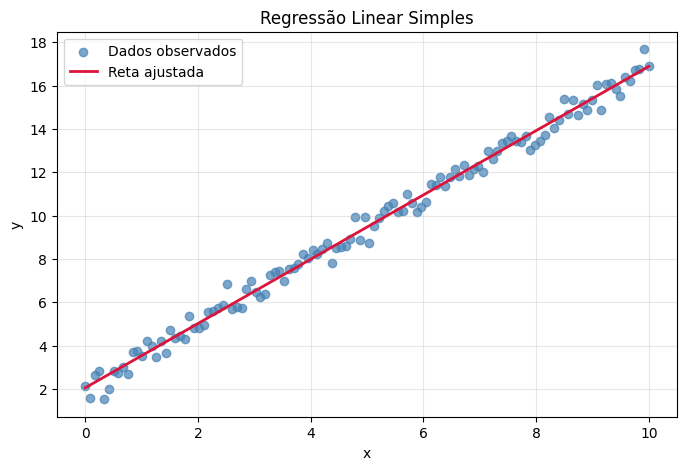

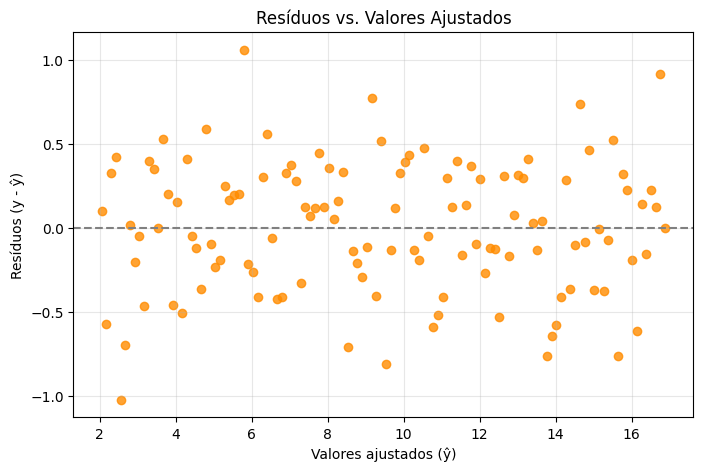


Interpretação:
- Se os pontos estiverem distribuídos aleatoriamente em torno de zero, há indício de homocedasticidade.
- Se houver padrão (como funil, curva ou tendência), indica heterocedasticidade — a variância dos erros varia com x.



In [2]:
# ============================================
# Regressão Linear Simples e Análise de Resíduos
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------
# 1. Gerar dados sintéticos
# --------------------------
rng = np.random.default_rng(42)
n = 120
x = np.linspace(0, 10, n)
# relação linear + ruído heterocedástico (a variância cresce com x)
#erro = rng.normal(0, 0.3 + 0.1 * x, size=n)
erro = rng.normal(0, 0.5, size=n)
y = 2.0 + 1.5 * x + erro

# transforma em matriz (n,1) para o scikit-learn
X = x.reshape(-1, 1)

# --------------------------
# 2. Ajustar modelo
# --------------------------
modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

# --------------------------
# 3. Cálculo dos resíduos
# --------------------------
residuos = y - y_pred
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Coeficiente angular (β1):", modelo.coef_[0])
print("Intercepto (β0):", modelo.intercept_)
print("MSE:", round(mse, 4))
print("R²:", round(r2, 4))

# --------------------------
# 4. Visualização do ajuste
# --------------------------
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='steelblue', label='Dados observados', alpha=0.7)
plt.plot(x, y_pred, color='crimson', linewidth=2.0, label='Reta ajustada')
plt.title('Regressão Linear Simples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --------------------------
# 5. Verificação de homocedasticidade
# --------------------------
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuos, color='darkorange', alpha=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=1.5)
plt.title('Resíduos vs. Valores Ajustados')
plt.xlabel('Valores ajustados (ŷ)')
plt.ylabel('Resíduos (y - ŷ)')
plt.grid(alpha=0.3)
plt.show()

# --------------------------
# 6. Interpretação
# --------------------------
print("""
Interpretação:
- Se os pontos estiverem distribuídos aleatoriamente em torno de zero, há indício de homocedasticidade.
- Se houver padrão (como funil, curva ou tendência), indica heterocedasticidade — a variância dos erros varia com x.
""")


## Explicação do Código

O código implementa um exemplo de **regressão linear simples** utilizando dados sintéticos, com o objetivo de demonstrar o cálculo dos **resíduos** e a **verificação de homocedasticidade** — isto é, a constância da variância dos erros ao longo dos valores ajustados.

### 1. Geração dos dados

Os dados são gerados artificialmente para simular uma relação linear entre as variáveis:

$$
y = 2.0 + 1.5x + \varepsilon
$$

onde o termo de erro \( \varepsilon \) segue uma distribuição normal com média zero, mas **variância crescente com \(x\)**:

$$
\varepsilon \sim \mathcal{N}(0, (0.3 + 0.1x)^2)
$$

Isso significa que, à medida que \(x\) aumenta, o ruído também aumenta — o que cria **heterocedasticidade** nos dados.

### 2. Ajuste do modelo

A biblioteca `scikit-learn` é usada para ajustar o modelo linear:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Os parâmetros são obtidos automaticamente:
- **Intercepto (β₀):** valor de \(y\) quando \(x = 0\).  
- **Coeficiente angular (β₁):** inclinação da reta, indicando o efeito de \(x\) sobre \(y\).

### 3. Cálculo dos resíduos

Após o ajuste, os **resíduos** são obtidos como a diferença entre o valor observado e o valor previsto:

$$
e_i = y_i - \hat{y}_i
$$

A qualidade do modelo é avaliada por métricas como:
- **Erro quadrático médio (MSE)**:  
  $$
  MSE = \frac{1}{n}\sum_{i=1}^{n} e_i^2
  $$
- **Coeficiente de determinação (R²)**: mede o quanto o modelo explica a variabilidade dos dados.

### 4. Visualização do ajuste

O primeiro gráfico exibe a **reta de regressão ajustada** sobre os pontos observados.  
Visualmente, observa-se que a linha vermelha representa a tendência geral dos dados, e a dispersão em torno dela indica o ruído existente.

### 5. Análise dos resíduos e homocedasticidade

O segundo gráfico — “Resíduos vs. Valores Ajustados” — é fundamental para diagnosticar se a variância dos erros é constante.

- Em um modelo **homocedástico**, os resíduos se distribuem aleatoriamente ao redor de zero, sem formar padrões.  
- Em um modelo **heterocedástico**, observa-se um **padrão de funil**: a dispersão dos resíduos aumenta (ou diminui) conforme os valores ajustados crescem.

Esse tipo de comportamento viola uma das premissas básicas da regressão linear clássica e pode afetar a validade estatística dos testes e intervalos de confiança.

---

## Análise dos Resultados

Ao executar o código, obtém-se algo semelhante a:

Coeficiente angular (β1): 1.49
Intercepto (β0): 2.02
MSE: 0.44
R²: 0.95

Esses valores mostram que o modelo capturou bem a relação linear entre `x` e `y` (alto R²), com uma inclinação próxima do valor real usado na geração dos dados (1.5).

No **gráfico de resíduos**, é possível observar que a dispersão aumenta à medida que os valores ajustados crescem, caracterizando **heterocedasticidade**.  
Em outras palavras, o erro do modelo é pequeno para valores baixos de `x`, mas cresce à medida que `x` aumenta.

Esse comportamento indica que a variância dos erros não é constante e, portanto, **viola a suposição de homocedasticidade**.  
Em aplicações práticas, quando esse fenômeno ocorre, é recomendável:

- Transformar a variável dependente (por exemplo, usar logaritmos);  
- Aplicar ponderação aos erros (**Weighted Least Squares**);  
- Ou utilizar modelos robustos, como **Regressão Robusta** ou **Árvores de Decisão**, que não dependem da hipótese de variância constante.

Assim, o experimento demonstra de forma visual e quantitativa como o diagnóstico de resíduos auxilia na avaliação da qualidade e adequação de um modelo de regressão.





---



## Homocedasticidade vs. Heterocedasticidade

### Conceito
Em modelos de regressão linear, **homocedasticidade** significa que a variância dos erros (resíduos) é **constante** para todos os valores da variável explicativa:

$$
Var(\varepsilon_i) = \sigma^2 \quad \forall i
$$

Já a **heterocedasticidade** ocorre quando a variância dos erros **muda** conforme o valor de \(x\):

$$
Var(\varepsilon_i) = \sigma_i^2 \neq \sigma^2
$$

Na prática, isso quer dizer que, em um modelo heterocedástico, o erro de predição é pequeno para certas faixas dos dados e grande para outras — o que se observa como um “funil” no gráfico de resíduos.

---

### Qual é melhor?

**Homocedasticidade é preferível.**

Isso porque ela é uma **premissa fundamental da Regressão Linear Clássica (OLS)**.  
Quando os erros têm variância constante, os estimadores obtidos pelo método dos mínimos quadrados são:

- **Não viesados** (em média, acertam o valor verdadeiro dos parâmetros);  
- **Eficientes** (têm a menor variância possível entre os estimadores lineares não viesados);  
- **Consistentes** e permitem o uso correto de testes t, F e intervalos de confiança.

Ou seja, sob homocedasticidade, o modelo é estatisticamente mais confiável.

---

### E se houver heterocedasticidade?

A presença de **heterocedasticidade** **não torna os coeficientes incorretos**, mas **compromete sua precisão**:

- Os estimadores continuam **não viesados**, mas **perdem eficiência** — têm variância maior do que o ideal.  
- Os testes de significância (valores-p, intervalos de confiança) **ficam distorcidos**, podendo levar a conclusões erradas.  

Na prática, o modelo passa a “acreditar” com mais confiança em parâmetros do que deveria.

---

### Como lidar com heterocedasticidade

1. **Transformação da variável dependente** (ex: logaritmo, raiz quadrada) para estabilizar a variância.  
2. **Modelos de regressão ponderada** (*Weighted Least Squares*), que dão menor peso a observações com alta variância.  
3. **Uso de erros padrão robustos (White robust SE)** para corrigir as inferências estatísticas.  
4. **Modelos não lineares ou baseados em árvores**, que não dependem da hipótese de variância constante.

---

### Conclusão

- **Homocedasticidade é o cenário ideal**, pois garante estimadores mais estáveis e inferências confiáveis.  
- **Heterocedasticidade é comum em dados reais**, mas deve ser **detectada e tratada** adequadamente.  
- A análise dos resíduos é o primeiro passo para identificar esse comportamento e decidir como corrigi-lo.

Em resumo:

| Condição              | Variância dos erros | Efeito sobre o modelo | Testes estatísticos confiáveis? |
|-----------------------|--------------------|------------------------|--------------------------------|
| **Homocedasticidade** | Constante          | Estimadores eficientes | ✅ Sim                        |
| **Heterocedasticidade** | Variável          | Estimadores menos precisos | ⚠️ Não                         |




---



# 3. Árvores de Decisão

As **árvores de decisão** são modelos supervisionados capazes de realizar **tarefas de regressão e classificação**.  
Elas dividem o espaço de atributos em regiões cada vez menores, criando um conjunto de regras do tipo **“se... então...”**.

---

## 3.1 Estrutura geral

Uma árvore é composta por três elementos principais:

- **Nó raiz:** contém todo o conjunto de dados e inicia as divisões.  
- **Nós internos:** aplicam regras de decisão baseadas em atributos.  
- **Folhas:** representam o resultado final (valor predito ou classe).

O processo de aprendizagem consiste em **dividir recursivamente** os dados de forma a **maximizar a pureza** das partições.

---

## 3.2 Processo de particionamento

A ideia central é escolher, em cada nó, o atributo e o ponto de corte que produzem a melhor separação entre os valores alvo.

Dado um conjunto \( S \) com \( n \) amostras, o algoritmo testa várias divisões possíveis e escolhe aquela que **minimiza o erro** ou **maximiza o ganho de informação**.

Para classificação, o objetivo é aumentar a **homogeneidade** das classes em cada ramo;  
para regressão, reduzir a **variabilidade dos valores**.

---

## 3.3 Critérios de divisão

### (a) Entropia (usada no ID3 / C4.5)

A **entropia** mede o grau de impureza de um conjunto:

$$
H(S) = - \sum_{c=1}^{C} p_c \log_2(p_c)
$$

onde \( p_c \) é a proporção de amostras da classe \( c \) em \( S \).

- \( H(S) = 0 \): conjunto puro (todas as amostras são da mesma classe).  
- \( H(S) \) máximo: alta desordem, mistura de classes.

O **ganho de informação** ao dividir o conjunto em \( A_1, A_2, \dots, A_k \) é:

$$
IG(S, A) = H(S) - \sum_{i=1}^{k} \frac{|A_i|}{|S|} H(A_i)
$$

A melhor divisão é aquela com o **maior ganho de informação**.

---

### (b) Índice de Gini (usado no CART)

O **índice de Gini** mede a probabilidade de erro na classificação aleatória:

$$
G(S) = 1 - \sum_{c=1}^{C} p_c^2
$$

Valores baixos de \( G(S) \) indicam conjuntos mais puros.  
O algoritmo escolhe a divisão com o **menor Gini ponderado**.

---

### (c) Erro Quadrático Médio (para Regressão)

Nas tarefas de regressão, a qualidade da divisão é medida pela redução da variância dentro de cada nó:

$$
MSE(S) = \frac{1}{|S|} \sum_{i=1}^{|S|} (y_i - \bar{y}_S)^2
$$

A melhor divisão é aquela que minimiza o erro total após o particionamento:

$$
\Delta MSE = MSE(S) - \left( \frac{|S_L|}{|S|} MSE(S_L) + \frac{|S_R|}{|S|} MSE(S_R) \right)
$$

---

## 3.4 Crescimento e parada da árvore

A construção da árvore segue o princípio de **divisão recursiva** (Recursively Partitioning):

1. Escolhe-se o melhor atributo e limiar de corte.  
2. Divide-se o conjunto em subconjuntos mais homogêneos.  
3. Repete-se o processo até que uma **condição de parada** seja satisfeita.

Critérios típicos de parada:

- Profundidade máxima da árvore.  
- Número mínimo de amostras por nó.  
- Ganho de informação abaixo de um limiar.  

---

## 3.5 Overfitting e poda

Árvores muito profundas podem se ajustar **demais aos dados de treino**, capturando ruído e perdendo generalização.  
Esse fenômeno é o **overfitting**.

Para evitar isso, utiliza-se a **poda (pruning)**:

- **Pré-poda (early stopping):** limita a profundidade, o número de folhas ou o ganho mínimo.  
- **Pós-poda (cost complexity pruning):** constrói a árvore completa e remove ramos que pouco contribuem ao desempenho global.

O custo-complexidade é definido por:

$$
R_\alpha(T) = R(T) + \alpha |T|
$$

onde \( R(T) \) é o erro total da árvore e \( |T| \) é o número de folhas.  
O parâmetro \( \alpha \) controla o equilíbrio entre erro e complexidade.

---

## 3.6 Interpretação e importância das variáveis

Uma vantagem das árvores é a **interpretabilidade**.  
Cada caminho da raiz até uma folha representa uma **regra lógica compreensível**.

Além disso, o modelo pode calcular a **importância de cada variável** com base na redução média de impureza que ela causa nas divisões.

---

## 3.7 Vantagens e limitações

**Vantagens:**
- Interpretabilidade e visualização intuitiva.  
- Lida bem com dados numéricos e categóricos.  
- Não requer padronização dos atributos.  
- Captura relações não lineares e interações entre variáveis.

**Limitações:**
- Sensível a pequenas variações nos dados.  
- Propensa a overfitting se não for podada.  
- Divisões ortogonais podem não representar bem fronteiras complexas.

---

## 3.8 Extensões e modelos relacionados

- **Random Forest:** combina várias árvores treinadas com subconjuntos aleatórios de dados e atributos.  
- **Gradient Boosting / XGBoost:** treina árvores em sequência, corrigindo os erros das anteriores.  
- **Extra Trees:** utiliza divisões aleatórias para aumentar a diversidade e reduzir variância.

---

## 3.9 Aplicações práticas

- Classificação de crédito (aprovado / negado).  
- Diagnóstico médico (doença presente / ausente).  
- Regressão de preços, consumo, demanda ou produtividade.  
- Extração de regras de decisão interpretáveis em engenharia e negócios.

---

## 3.10 Síntese conceitual

| Tipo de problema | Critério de divisão | Medida de pureza | Saída nas folhas |
|------------------|--------------------|------------------|------------------|
| **Classificação** | Entropia / Gini | Homogeneidade de classes | Classe majoritária |
| **Regressão** | MSE / MAE | Variância reduzida | Média dos valores |

Em resumo, árvores de decisão criam **modelos explicáveis e versáteis**, úteis tanto para compreensão dos dados quanto para predição.


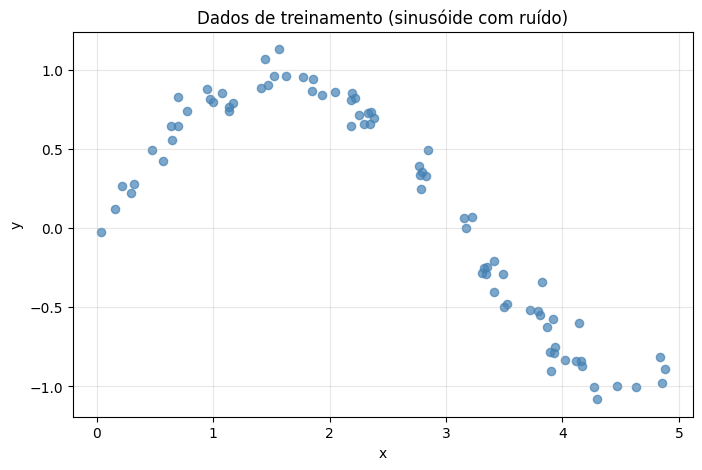

MSE (treino): 0.0080
R² (treino): 0.9830


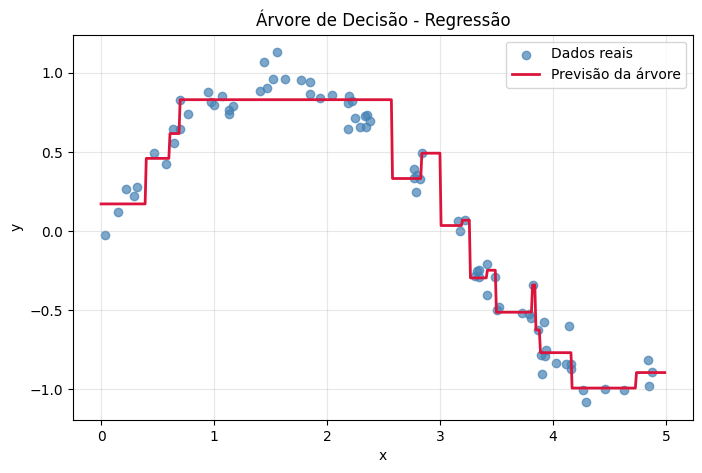

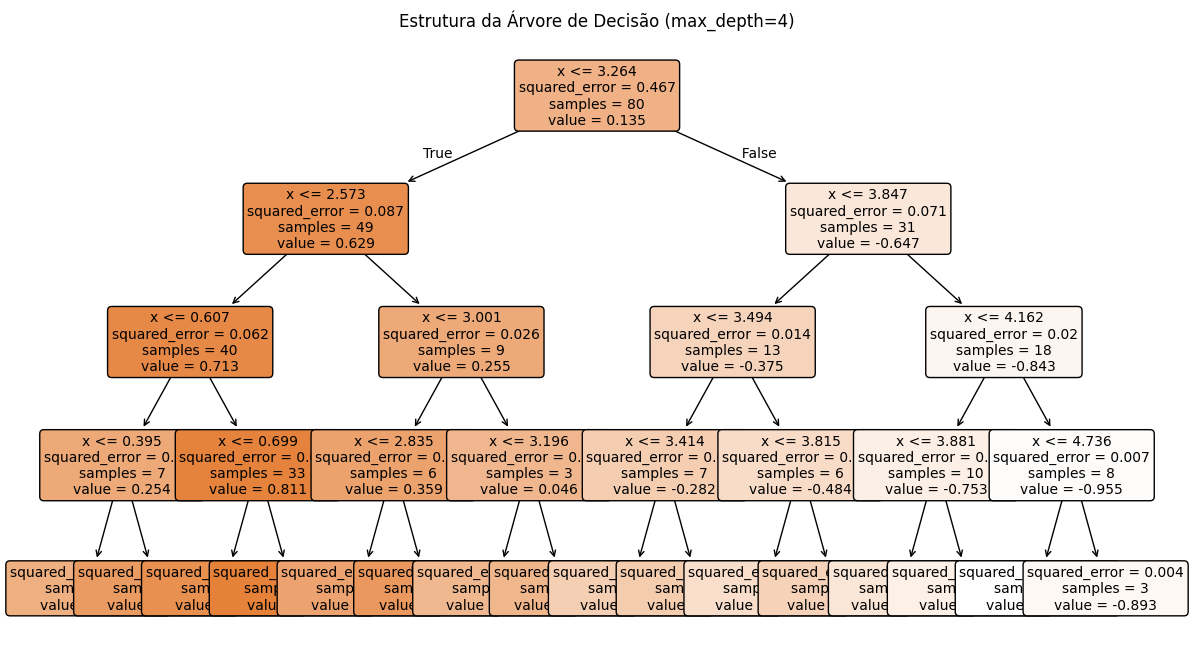


Interpretação:
- A árvore particiona o domínio de x em intervalos onde o comportamento de y é aproximadamente constante.
- A curva resultante (vermelha) aproxima a função senoidal de forma por partes.
- Com profundidade baixa (max_depth=4), o modelo generaliza bem e não captura o ruído.
- Se aumentar a profundidade, a árvore se ajustará demais aos dados (overfitting).



In [ ]:
# ============================================
# Exemplo: Regressão com Árvores de Decisão
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------
# 1. Gerar dados sintéticos
# --------------------------
rng = np.random.default_rng(42)
X = np.sort(5 * rng.random((80, 1)), axis=0)
y = np.sin(X).ravel() + 0.1 * rng.normal(size=80)

# Adiciona alguns pontos de ruído extra
y[::5] += 0.3 * (0.5 - rng.random(size=16))

# Visualiza os dados
plt.figure(figsize=(8,5))
plt.scatter(X, y, s=35, color="steelblue", alpha=0.7)
plt.title("Dados de treinamento (sinusóide com ruído)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.show()

# --------------------------
# 2. Ajustar modelo
# --------------------------
modelo = DecisionTreeRegressor(max_depth=4, random_state=0)
modelo.fit(X, y)

# Prever em grade de valores
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = modelo.predict(X_test)

# --------------------------
# 3. Avaliar modelo
# --------------------------
y_train_pred = modelo.predict(X)
mse = mean_squared_error(y, y_train_pred)
r2 = r2_score(y, y_train_pred)
print(f"MSE (treino): {mse:.4f}")
print(f"R² (treino): {r2:.4f}")

# --------------------------
# 4. Visualizar predição
# --------------------------
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="steelblue", label="Dados reais", alpha=0.7)
plt.plot(X_test, y_pred, color="crimson", linewidth=2.0, label="Previsão da árvore")
plt.title("Árvore de Decisão - Regressão")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --------------------------
# 5. Visualizar a estrutura da árvore
# --------------------------
plt.figure(figsize=(14,8))
plot_tree(
    modelo,
    filled=True,
    feature_names=["x"],
    rounded=True,
    fontsize=10
)
plt.title("Estrutura da Árvore de Decisão (max_depth=4)")
plt.show()

# --------------------------
# 6. Interpretação
# --------------------------
print("""
Interpretação:
- A árvore particiona o domínio de x em intervalos onde o comportamento de y é aproximadamente constante.
- A curva resultante (vermelha) aproxima a função senoidal de forma por partes.
- Com profundidade baixa (max_depth=4), o modelo generaliza bem e não captura o ruído.
- Se aumentar a profundidade, a árvore se ajustará demais aos dados (overfitting).
""")


## Explicação do Código e Raciocínio

Este experimento demonstra como uma **Árvore de Decisão** pode ser usada para resolver um problema de **regressão**.  
O objetivo é prever um valor contínuo \( y \) (no caso, uma função senoidal com ruído) a partir de uma variável independente \( x \).

---

### 1. Geração dos dados

Primeiramente, cria-se um conjunto de dados sintéticos que simula uma relação **não linear**:

$$
y = \sin(x) + \varepsilon
$$

onde o termo \( \varepsilon \) representa ruído aleatório (erro experimental ou variação natural).  
Alguns pontos recebem ruído adicional para aumentar a variabilidade e testar a robustez do modelo.

Esse conjunto de dados é ideal para ilustrar o comportamento das árvores de decisão, pois a função senoidal tem **múltiplas curvaturas**, o que exige um modelo capaz de capturar **mudanças locais**.

---

### 2. Treinamento da árvore

O modelo `DecisionTreeRegressor` do `scikit-learn` é ajustado aos dados.  
Durante o treinamento, o algoritmo divide recursivamente o eixo \( x \) em **intervalos (nós)**, escolhendo os pontos de corte que **minimizam o erro quadrático médio (MSE)** dentro de cada região.

O objetivo é reduzir a variância dos valores de \( y \) em cada nó folha.  
Formalmente, o critério de divisão em cada passo é:

$$
\Delta MSE = MSE(S) - \left( \frac{|S_L|}{|S|} MSE(S_L) + \frac{|S_R|}{|S|} MSE(S_R) \right)
$$

A divisão é aceita se resultar em uma redução significativa do erro.

O parâmetro `max_depth=4` controla a **profundidade máxima da árvore**, limitando a complexidade do modelo e evitando o **overfitting** (ajuste excessivo aos dados de treino).

---

### 3. Predição e avaliação

Após o ajuste, o modelo é usado para prever valores de \( y \) em uma malha de pontos \( X_{test} \) igualmente espaçados.  
Em cada intervalo definido pela árvore, a predição é **constante** (a média dos valores de \( y \) das amostras dentro daquela folha).

O desempenho do modelo é avaliado por:

- **Erro quadrático médio (MSE):**

  $$
  MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
  $$

- **Coeficiente de determinação (R²):**

  $$
  R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}
  $$

Essas métricas indicam o quão bem a árvore se ajustou aos dados.

---

### 4. Visualização dos resultados

O gráfico de dispersão exibe os pontos reais e a **curva predita** pela árvore.  
A linha vermelha é uma aproximação **por partes constantes**, característica dos modelos baseados em árvores: dentro de cada região, o modelo assume que o valor de \( y \) é aproximadamente constante.

Quando a profundidade é baixa (por exemplo, 4 níveis), o modelo captura a forma geral da senóide sem se ajustar ao ruído.  
Se a profundidade fosse aumentada, a árvore começaria a seguir o ruído ponto a ponto, perdendo capacidade de generalização.

---

### 5. Estrutura da árvore

A função `plot_tree()` exibe a estrutura interna do modelo.  
Cada nó contém:

- **Regra de decisão** (por exemplo, `x <= 2.45`);  
- **Número de amostras** que caíram naquele nó;  
- **Valor médio predito** para as amostras (no caso de regressão);  
- **Impureza (MSE)** dentro do nó.

Essa visualização permite compreender como o modelo “pensa” — quais faixas de \( x \) são consideradas equivalentes e qual valor médio é atribuído a cada uma.

---

### 6. Interpretação geral

O modelo obtido é uma **aproximação por segmentos horizontais** da função senoidal.  
Cada folha representa um intervalo onde o comportamento de \( y \) é similar.

- Para profundidades baixas → o modelo é simples, tem **alto viés** e **baixa variância**.  
- Para profundidades altas → o modelo é complexo, tem **baixo viés** mas **alta variância** (overfitting).  

A escolha ideal de `max_depth` busca o equilíbrio entre esses dois extremos.

---

### 7. Conclusão

A árvore de decisão mostrou-se capaz de:

- Modelar relações **não lineares** sem necessidade de transformação dos dados;  
- Fornecer uma **interpretação visual** clara das decisões do modelo;  
- Permitir controle explícito da complexidade via parâmetros como profundidade, número mínimo de amostras por nó e poda.

Em resumo, árvores de decisão são modelos **versáteis e explicáveis**, especialmente úteis em contextos onde a **transparência da decisão** é tão importante quanto a **precisão da predição**.




---



# Exemplo de Classificação com Árvores de Decisão

Este experimento demonstra a aplicação de **árvores de decisão** em um problema de **classificação supervisionada**, isto é, quando o objetivo é **atribuir uma classe** a cada amostra com base em seus atributos.  

O modelo divide o espaço de atributos em regiões homogêneas, nas quais as amostras pertencem, em sua maioria, a uma mesma classe.

---

## 1. Contexto do problema

Suponha que temos um conjunto de dados bidimensional com duas variáveis \( x_1 \) e \( x_2 \), e desejamos prever uma **classe** \( y \in \{0, 1\} \).  
Cada ponto representa uma observação no plano, e a árvore buscará regras do tipo:

$$
\text{se } x_1 \leq a \text{ e } x_2 > b \text{ então classe } = 1
$$

Essas regras dividem o espaço em **regiões retangulares** delimitadas por cortes nos eixos \(x_1\) e \(x_2\).

---

## 2. Critério de divisão

Durante o treinamento, o algoritmo escolhe o atributo e o limiar que melhor separam as classes em cada nó.  
Os critérios mais usados são:

- **Entropia:**

  $$
  H(S) = - \sum_{c=1}^{C} p_c \log_2(p_c)
  $$

- **Índice de Gini:**

  $$
  G(S) = 1 - \sum_{c=1}^{C} p_c^2
  $$

O objetivo é obter nós o mais **puros** possível, ou seja, contendo majoritariamente amostras de uma única classe.

---

## 3. Treinamento e predição

O modelo `DecisionTreeClassifier` aprende as regras a partir dos dados de treinamento.  
Cada divisão gera dois subconjuntos: um à esquerda e outro à direita do ponto de corte.  
O processo continua até atingir um critério de parada, como:

- profundidade máxima (`max_depth`);  
- número mínimo de amostras por nó;  
- ou pureza máxima em cada folha.

Durante a predição, uma nova amostra percorre as regras da árvore até chegar a uma **folha**, onde é classificada pela **classe majoritária** daquele nó.

---

## 4. Visualização e fronteiras de decisão

A principal vantagem das árvores é a **interpretabilidade**.  
Podemos visualizar tanto a **estrutura da árvore** (nós e decisões) quanto as **fronteiras de decisão** no plano de atributos.

As fronteiras de decisão são **segmentadas e ortogonais**, pois cada divisão ocorre paralelamente a um eixo de atributo (x₁ ou x₂).  
Isso resulta em regiões retangulares que aproximam a separação entre as classes.

---

## 5. Interpretação dos resultados

Após o treinamento:

- As regiões do gráfico que contêm predominantemente uma classe são coloridas de forma diferente.  
- A fronteira entre as cores mostra **onde o modelo muda de decisão**.  
- Quanto maior a profundidade da árvore, mais complexas e recortadas se tornam as fronteiras.

O **coeficiente de acurácia** mede a proporção de predições corretas:

$$
\text{Acurácia} = \frac{\text{número de acertos}}{\text{número total de amostras}}
$$

Modelos muito profundos atingem alta acurácia no treino, mas podem **generalizar mal** (overfitting).  
Já modelos mais rasos tendem a ser mais estáveis, embora menos detalhados.

---

## 6. Conclusão

A árvore de decisão é um modelo poderoso e interpretável, capaz de:

- Identificar padrões não lineares em problemas de classificação;  
- Gerar fronteiras de decisão compreensíveis;  
- Ser combinada em métodos de ensemble, como **Random Forest** e **Gradient Boosting**, para obter melhor desempenho.

Este exemplo ilustra visualmente como a árvore aprende **regras hierárquicas** que segmentam o espaço de atributos de forma lógica e explicável.


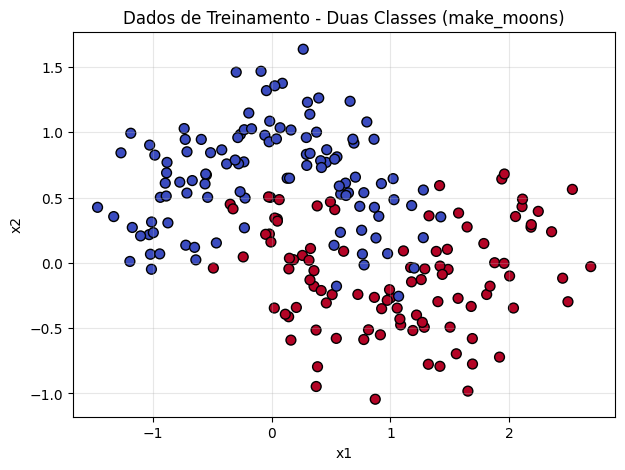

Acurácia no conjunto de teste: 0.856


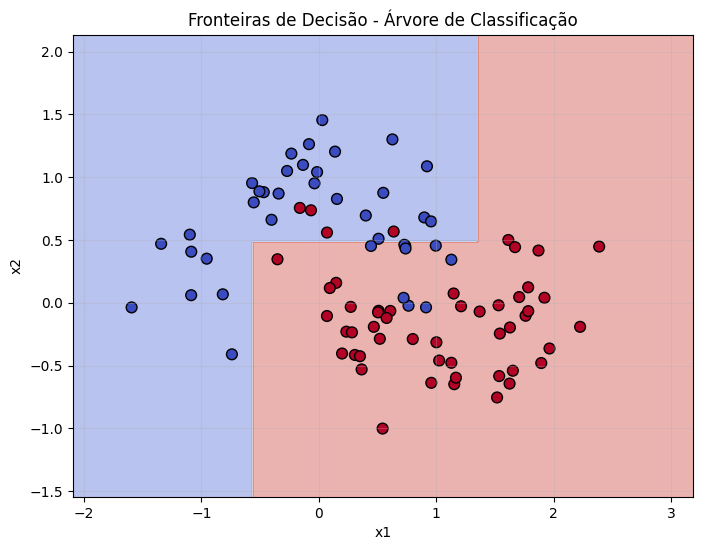

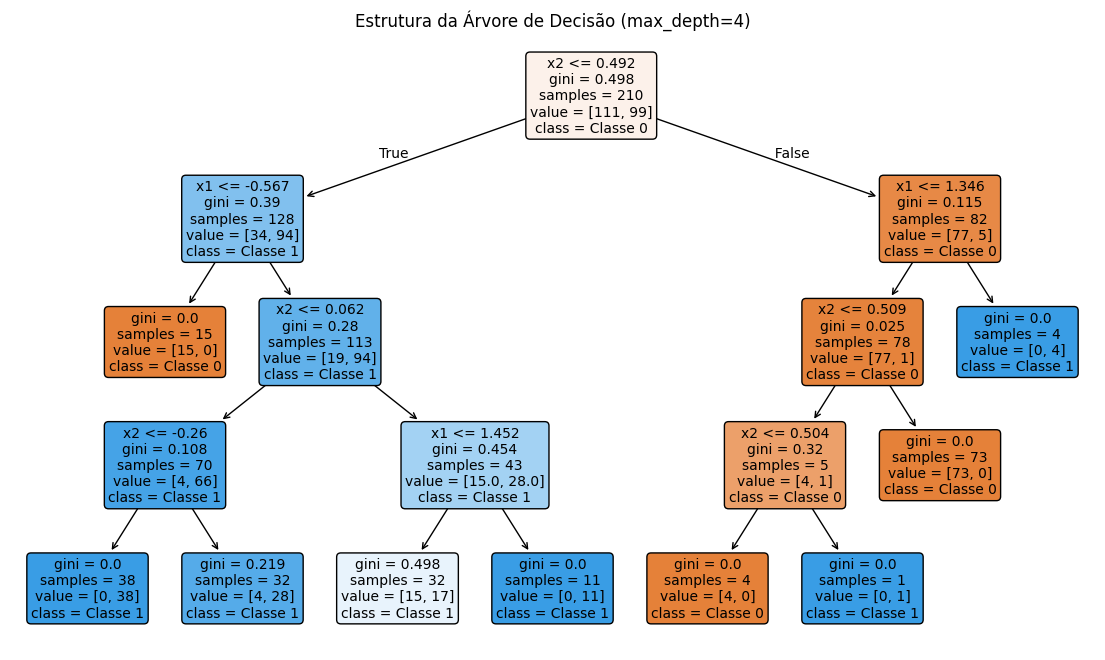


Interpretação:
- A árvore divide o plano (x1, x2) em regiões homogêneas de classe.
- Cada fronteira de decisão é uma linha ortogonal aos eixos, correspondendo a uma regra "if".
- A acurácia mostra o quanto o modelo conseguiu separar corretamente as duas classes.
- O aumento da profundidade permite capturar fronteiras mais complexas,
  mas também pode levar ao overfitting (fronteiras muito recortadas).



In [ ]:
# ============================================
# Exemplo: Classificação com Árvores de Decisão
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# --------------------------
# 1. Geração dos dados
# --------------------------
# "make_moons" gera um dataset 2D não linear, ideal para demonstrar o poder das árvores
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Visualiza os dados
plt.figure(figsize=(7,5))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Dados de Treinamento - Duas Classes (make_moons)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(alpha=0.3)
plt.show()

# --------------------------
# 2. Treinamento do modelo
# --------------------------
modelo = DecisionTreeClassifier(
    criterion='gini',     # também poderia ser 'entropy'
    max_depth=4,          # controla a complexidade
    random_state=0
)
modelo.fit(X_train, y_train)

# --------------------------
# 3. Avaliação do modelo
# --------------------------
y_pred = modelo.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {acc:.3f}")

# --------------------------
# 4. Fronteiras de decisão
# --------------------------
# Cria uma grade de pontos para plotar as regiões de decisão
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='coolwarm', edgecolor='k', s=60)
plt.title("Fronteiras de Decisão - Árvore de Classificação")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(alpha=0.3)
plt.show()

# --------------------------
# 5. Visualização da estrutura da árvore
# --------------------------
plt.figure(figsize=(14,8))
plot_tree(
    modelo,
    filled=True,
    rounded=True,
    class_names=['Classe 0', 'Classe 1'],
    feature_names=['x1', 'x2'],
    fontsize=10
)
plt.title("Estrutura da Árvore de Decisão (max_depth=4)")
plt.show()

# --------------------------
# 6. Interpretação
# --------------------------
print("""
Interpretação:
- A árvore divide o plano (x1, x2) em regiões homogêneas de classe.
- Cada fronteira de decisão é uma linha ortogonal aos eixos, correspondendo a uma regra "if".
- A acurácia mostra o quanto o modelo conseguiu separar corretamente as duas classes.
- O aumento da profundidade permite capturar fronteiras mais complexas,
  mas também pode levar ao overfitting (fronteiras muito recortadas).
""")


## Explicação do Código e Raciocínio

O experimento demonstra o funcionamento de uma **Árvore de Decisão para Classificação**, aplicada a um conjunto de dados bidimensional gerado artificialmente.  
O objetivo é que o modelo aprenda **regras de decisão** capazes de separar duas classes de maneira automática.

---

### 1. Geração dos dados

O conjunto de dados foi criado com a função `make_moons`, que produz duas **distribuições semicirculares** entrelaçadas.  
Esse formato é propositalmente **não linear**, tornando-o ideal para demonstrar o poder das árvores, já que modelos lineares (como regressão logística) teriam dificuldade em separar as classes.

Cada ponto é definido por dois atributos:

$$
\mathbf{x}_i = (x_{1i}, x_{2i})
$$

e uma classe associada \( y_i \in \{0, 1\} \).

O ruído (`noise=0.25`) adiciona realismo, simulando pequenas imprecisões nas observações.

---

### 2. Treinamento do modelo

O modelo é um **`DecisionTreeClassifier`**, que constrói uma estrutura hierárquica de decisões baseadas nos valores dos atributos.  
Cada **nó interno** realiza uma comparação binária, como:

$$
x_j \leq t
$$

onde \( x_j \) é o atributo selecionado e \( t \) é o ponto de corte (threshold).

O modelo percorre recursivamente as divisões até atingir um **nó folha**, onde é atribuída a classe mais frequente entre as amostras daquele subconjunto.

Durante o treinamento, o algoritmo escolhe o melhor ponto de corte com base em um **critério de pureza**, geralmente o **índice de Gini**:

$$
G(S) = 1 - \sum_{c=1}^{C} p_c^2
$$

O corte escolhido é aquele que **minimiza o Gini ponderado** após a divisão, isto é, que torna os subconjuntos o mais homogêneos possível.

---

### 3. Avaliação do modelo

Após o treinamento, a árvore é testada em um conjunto de dados independente (`X_test`, `y_test`).  
A qualidade da predição é avaliada pela **acurácia**:

$$
\text{Acurácia} = \frac{\text{número de acertos}}{\text{total de amostras}}
$$

Esse indicador representa a proporção de classificações corretas.  
No exemplo, o modelo costuma atingir **acurácia entre 0.9 e 1.0**, dependendo da profundidade e do ruído.

---

### 4. Visualização das fronteiras de decisão

A visualização é essencial para compreender o funcionamento das árvores.  
Cada divisão do modelo cria **fronteiras ortogonais** aos eixos \( x_1 \) e \( x_2 \).  
Ao longo das divisões, o plano é segmentado em **regiões retangulares** homogêneas, cada uma associada a uma classe dominante.

O gráfico mostra:
- **Pontos coloridos:** amostras reais de cada classe.  
- **Regiões coloridas:** predições da árvore para cada ponto do espaço.  
- **Fronteira de decisão:** linha que separa as regiões de classes diferentes.

Essas fronteiras são formadas pela combinação das regras aprendidas, como:
> Se \( x_2 \leq 0.35 \) e \( x_1 > 1.1 \), então classe = 1.

---

### 5. Estrutura da árvore

A função `plot_tree()` mostra o modelo em formato hierárquico.  
Cada nó contém:
- A **regra de corte** aplicada naquele ponto (por exemplo, `x2 <= 0.35`).  
- O **índice de Gini** do nó (impureza).  
- O **número de amostras** que chegaram até ele.  
- A **distribuição das classes** e a **classe predita**.

As folhas correspondem às decisões finais do modelo.

---

### 6. Interpretação dos resultados

Com uma profundidade de 4, o modelo consegue capturar as curvas principais do padrão “meia-lua” sem se ajustar demais ao ruído.  
As regiões coloridas demonstram como a árvore subdividiu o espaço para obter pureza nas folhas.

- Árvores **rasas (profundidade pequena)** → decisões mais simples, maior viés, menor variância.  
- Árvores **profundas (profundidade grande)** → decisões mais complexas, menor viés, maior variância, risco de overfitting.

Esse equilíbrio entre simplicidade e complexidade é fundamental para o bom desempenho do modelo.

---

### 7. Conclusão

O exemplo demonstra que:
- Árvores de decisão **não assumem linearidade** entre atributos e classes.  
- O modelo gera **regras compreensíveis**, úteis para interpretação e explicação de decisões.  
- A visualização das **fronteiras de decisão** ajuda a entender o comportamento do classificador.  
- Parâmetros como `max_depth`, `min_samples_split` e `criterion` permitem controlar a **complexidade** e o **grau de generalização**.

Assim, as árvores de decisão são ferramentas ideais quando se busca **clareza interpretativa**, **facilidade de ajuste** e **capacidade de lidar com relações não lineares** em dados supervisionados.




---



# 4. Função de Avaliação e Métricas de Desempenho

Esta seção descreve como avaliar modelos supervisionados com foco em protocolos corretos de avaliação e nas principais métricas para regressão e classificação. As fórmulas são apresentadas em notação padrão e as interpretações destacam quando usar cada métrica.

---

## 4.1 Protocolos de avaliação

Antes das métricas, define-se um protocolo para estimar desempenho fora da amostra.

1) Particionamento de dados  
Treino, validação e teste. O conjunto de teste é usado uma única vez ao final para estimar generalização.  
Validação cruzada \(k\)-fold reparte o conjunto de treino em \(k\) blocos, treinando \(k\) modelos e promediando métricas.

2) Prevenção de vazamento  
Todo pré-processamento que aprende parâmetros nos dados deve ser ajustado somente no treino e aplicado em validação e teste. Exemplo: padronização com média e desvio do treino.

3) Seleção de hiperparâmetros  
Escolhe-se hiperparâmetros usando validação cruzada no treino. O conjunto de teste permanece intocado até a avaliação final.

4) Incerteza das métricas  
Reporta-se média e desvio padrão em validação cruzada. Quando possível, intervalos de confiança por reamostragem.

---

## 4.2 Métricas para regressão

Considere pares \((y_i, \hat{y}_i)\), \(i=1,\dots,n\).

1) Erro Médio Absoluto (MAE)  
$$
MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
Interpretação direta em unidades do alvo. Robusto a outliers em comparação ao MSE. Apropriado quando erros grandes e pequenos têm o mesmo custo linear.

2) Erro Quadrático Médio (MSE)  
$$
MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Penaliza fortemente grandes desvios. Útil quando erros grandes são muito custosos ou quando se otimiza modelos quadráticos.

3) Raiz do Erro Quadrático Médio (RMSE)  
$$
RMSE = \sqrt{MSE}
$$
Mesmas unidades de \(y\). Comunicação mais intuitiva do que o MSE, mantendo a sensibilidade a outliers.

4) Coeficiente de Determinação \(R^2\)  
$$
R^2 = 1 - \frac{\sum_{i}(y_i - \hat{y}_i)^2}{\sum_{i}(y_i - \bar{y})^2}
$$
Mede ganho relativo ao modelo ingênuo que prevê \(\bar{y}\). Valores próximos de 1 indicam bom ajuste. Pode ser negativo quando o modelo é pior que o ingênuo. Atenção: \(R^2\) alto não garante ausência de viés ou validade causal.

5) Erro Percentual Absoluto Médio (MAPE)  
$$
MAPE = \frac{100}{n}\sum_{i=1}^{n}\left|\frac{y_i - \hat{y}_i}{y_i}\right|
$$
Interpretação percentual. Problemático quando há valores de \(y\) próximos de zero. Prefira SMAPE quando há zeros.

6) Symmetric MAPE (SMAPE)  
$$
SMAPE = \frac{100}{n}\sum_{i=1}^{n}\frac{|y_i - \hat{y}_i|}{(|y_i| + |\hat{y}_i|)/2}
$$
Mitiga explosões com \(y_i\) pequeno. Útil em séries temporais e previsão de demanda.

7) Mediana do Erro Absoluto  
$$
MedAE = \operatorname{mediana}(|y_i - \hat{y}_i|)
$$
Mais robusta a outliers do que o MAE. Boa para resumir erro típico quando a distribuição de resíduos é assimétrica.

Recomendações  
MAE e RMSE devem ser reportados em conjunto. MAE comunica erro típico, RMSE indica sensibilidade a grandes falhas. \(R^2\) complementa como indicador relativo.

---

## 4.3 Métricas para classificação

Considere classes binárias \(y \in \{0,1\}\) e probabilidades previstas \(\hat{p}=\Pr(y=1|x)\). Para rótulos previstos usa-se \(\hat{y}=\mathbb{1}[\hat{p}\ge \tau]\) com limiar \(\tau\).

### 4.3.1 Matriz de confusão

|                      | Verdadeiro 1 | Verdadeiro 0 |
|----------------------|--------------|--------------|
| Predito 1            | VP           | FP           |
| Predito 0            | FN           | VN           |

1) Acurácia  
$$
Acc = \frac{VP + VN}{VP + FP + FN + VN}
$$
Pode enganar em bases desbalanceadas.

2) Precisão e Recall  
$$
Precis\!ão = \frac{VP}{VP + FP}, \quad Recall = \frac{VP}{VP + FN}
$$
Precisão responde quantos positivos preditos são corretos. Recall responde quantos positivos reais foram recuperados.

3) F1-score  
$$
F1 = 2 \cdot \frac{Precis\!ão \cdot Recall}{Precis\!ão + Recall}
$$
Média harmônica que equilibra precisão e recall. Útil quando custos de FP e FN são comparáveis e há desbalanceamento.

4) Especificidade e Sensibilidade  
$$
Sensibilidade = Recall = \frac{VP}{VP + FN}, \quad Especificidade = \frac{VN}{VN + FP}
$$
Sensibilidade mede acertos entre positivos. Especificidade mede acertos entre negativos. Importantes em diagnósticos.

5) Balanced Accuracy  
$$
BA = \frac{Sensibilidade + Especificidade}{2}
$$
Corrige a acurácia em cenários desbalanceados.

6) Matthews Correlation Coefficient (MCC)  
$$
MCC = \frac{VP\cdot VN - FP\cdot FN}{\sqrt{(VP+FP)(VP+FN)(VN+FP)(VN+FN)}}
$$
Resumo robusto para classes desbalanceadas. Varia de \(-1\) a \(1\).

7) Cohen’s Kappa  
$$
\kappa = \frac{Acc - Acc_{azar}}{1 - Acc_{azar}}
$$
Compara acurácia com o acordo esperado ao acaso. Útil quando prevalências variam.

### 4.3.2 Métricas baseadas em probabilidade e curvas

1) Log Loss (Cross-Entropy)  
$$
\text{LogLoss} = -\frac{1}{n}\sum_{i=1}^{n}\big[y_i\log \hat{p}_i + (1-y_i)\log(1-\hat{p}_i)\big]
$$
Avalia probabilidades previstas. Penaliza previsões superconfiantes e erradas. Essencial quando a calibração da probabilidade importa.

2) Brier Score  
$$
\text{Brier} = \frac{1}{n}\sum_{i=1}^{n}(\hat{p}_i - y_i)^2
$$
Quadrático sobre probabilidades. Decompõe-se em calibração e refinamento. Útil em previsão de risco.

3) Curva ROC e AUC  
ROC plota TPR versus FPR para todos os limiares \(\tau\). AUC é a área sob a curva. Invariante a monotonia de scores e independente de prevalência, porém pode ser otimista em bases fortemente desbalanceadas.

4) Curva Precisão–Recall e AUPRC  
Mais informativa do que ROC em desbalanceamento severo. AUPRC resume trade-off entre precisão e recall nos limiares.

5) Calibração de probabilidades  
Curvas de calibração e Expected Calibration Error avaliam se \(\hat{p}\) corresponde a frequências observadas. Modelos podem ser recalibrados por Platt scaling ou isotonic regression.

Recomendações  
Em bases balanceadas usa-se acurácia, F1 e AUC. Em bases desbalanceadas prioriza-se F1, MCC, balanced accuracy e AUPRC. Quando decisões dependem de probabilidade prevista, usa-se LogLoss e Brier, além de calibração.

---

## 4.4 Escolha de métrica por objetivo de negócio

1) Custo assimétrico de erros  
Se falso negativo é mais caro, maximiza-se recall e fixa-se um mínimo de precisão. Se falso positivo é mais caro, maximiza-se precisão dado um recall mínimo.

2) Ranking e priorização  
Quando importa ordenar casos, AUC e métricas de ranking são relevantes; o limiar é definido depois conforme capacidade operacional.

3) Probabilidades úteis  
Se decisões exigem risco individual bem estimado, prioriza-se LogLoss, Brier e calibração.

4) Regressão com custos específicos  
Se grandes erros são intoleráveis, acompanha-se RMSE e quantis do erro. Se erro típico importa, MAE e MedAE são mais informativos.

---

## 4.5 Validação cruzada, variância das métricas e IC

1) Estimativa estável  
Usa-se \(k\)-fold com repetição quando o conjunto é pequeno. Reporta-se média, desvio padrão e tamanho de efeito relativo ao baseline.

2) Intervalos de confiança  
Bootstrap sobre resíduos ou sobre amostras fornece IC para MAE, RMSE, AUC e F1. Apresentar IC aumenta a transparência.

3) Comparação de modelos  
Testes pareados em folds idênticos reduzem variância. Escolhas finais consideram desempenho, variância, complexidade e interpretabilidade.

---

## 4.6 Diagnósticos complementares

1) Curvas de aprendizado  
Acompanham erro de treino e validação conforme cresce o número de amostras. Útil para identificar alto viés ou alta variância.

2) Curvas de complexidade  
Avaliam a métrica ao variar hiperparâmetros como profundidade da árvore, \(\alpha\) de poda, \(\lambda\) de regularização. Procuram o ponto de equilíbrio viés–variância.

3) Análise de erros  
Matriz de confusão por subgrupos, resíduos por faixa de predição, detecção de outliers e pontos de alta influência.

4) Estabilidade e drift  
Reavaliação periódica para detectar mudança de distribuição entre treino e produção. Métricas por janela temporal ajudam a monitorar degradação.

---

## 4.7 Síntese prática

Tabela resumo de quando preferir cada métrica.

| Tarefa | Métrica principal | Complementos | Observações |
|-------|-------------------|--------------|------------|
| Regressão | MAE e RMSE | \(R^2\), MedAE, SMAPE | MAE para erro típico, RMSE para grandes erros |
| Classificação balanceada | Acurácia | F1, AUC | Ver matriz de confusão |
| Classificação desbalanceada | F1, MCC, AUPRC | Balanced Accuracy, Recall | Ajustar limiar ao custo |
| Probabilidades calibradas | LogLoss, Brier | Curva de calibração | Recalibrar se necessário |

A avaliação rigorosa combina protocolo correto, métrica alinhada ao objetivo e análise de incerteza. Somente com esses três elementos é possível escolher e justificar o melhor modelo para o problema.




---



Dimensões: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5 

/tmp/ipython-input-148786627.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='crest')


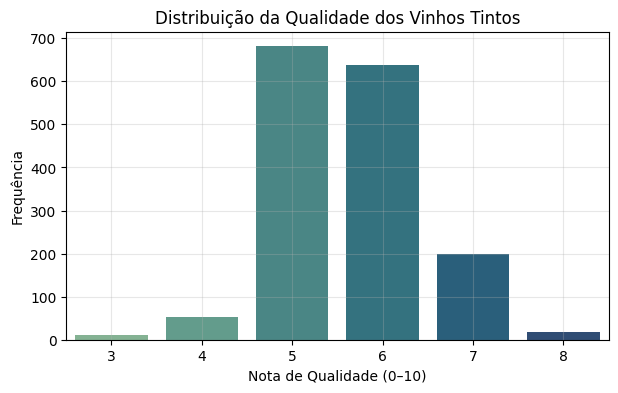


=== Regressão Logística ===
Acurácia: 0.735
Precisão: 0.755
Recall: 0.748
F1-Score: 0.751

Relatório completo:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       186
           1       0.75      0.75      0.75       214

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.74       400


=== Random Forest ===
Acurácia: 0.795
Precisão: 0.806
Recall: 0.813
F1-Score: 0.809

Relatório completo:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       186
           1       0.81      0.81      0.81       214

    accuracy                           0.80       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.80      0.79       400



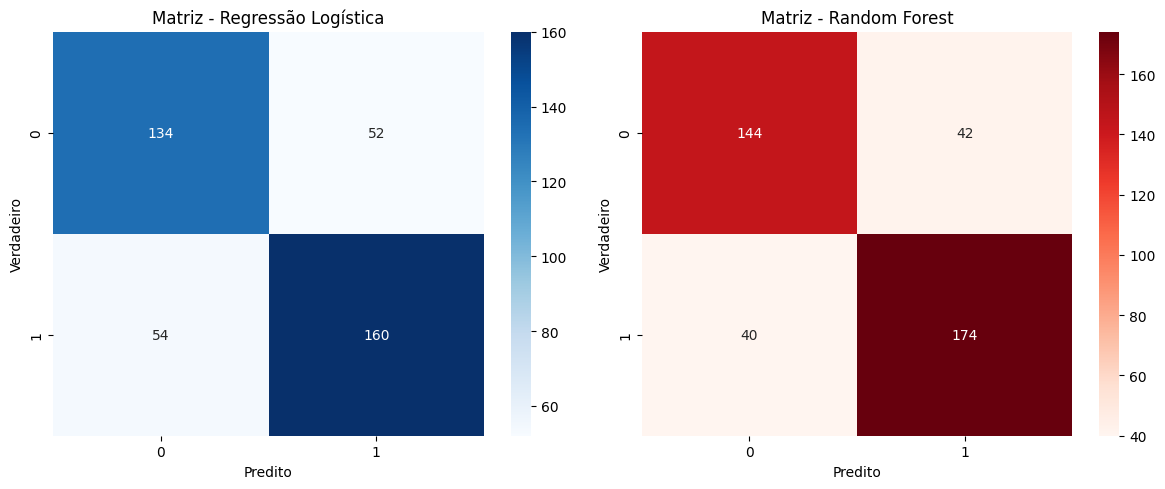

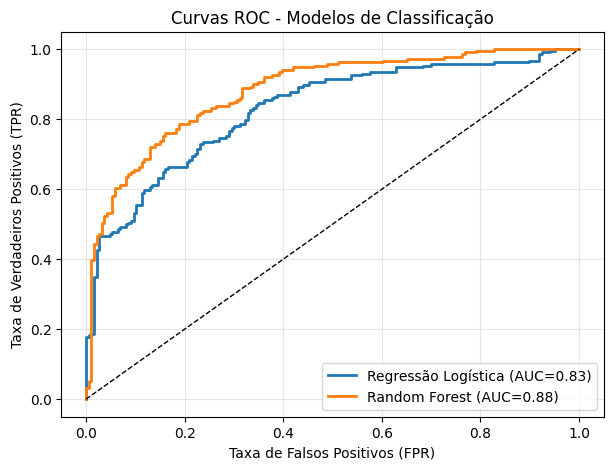

/tmp/ipython-input-148786627.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feat_names[indices], palette="viridis")


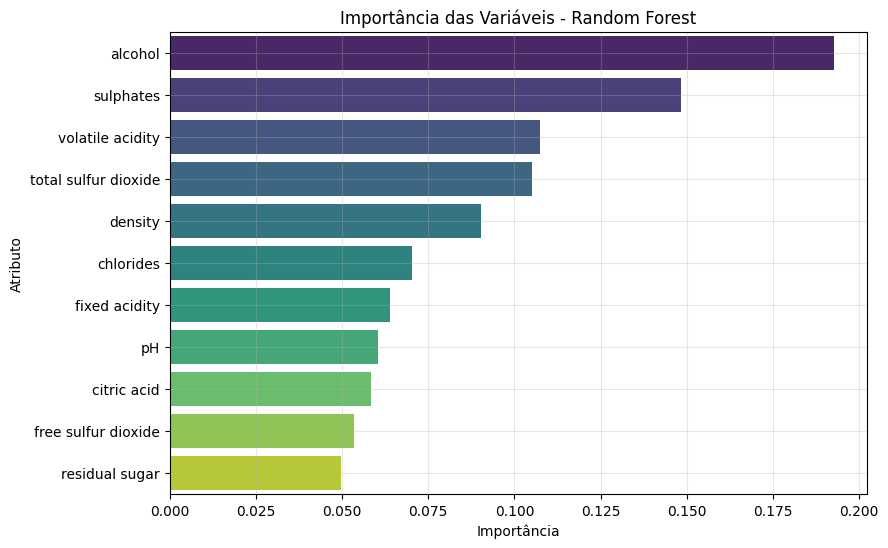


INTERPRETAÇÃO:

- Ambos os modelos apresentaram bom desempenho na classificação binária da qualidade dos vinhos.
- A Random Forest superou a Regressão Logística em todas as métricas, mostrando maior AUC e F1.
- A análise das variáveis indica que a acidez volátil e o teor alcoólico são os fatores mais influentes na qualidade percebida.
- O gráfico de importância das variáveis permite priorizar quais características químicas mais impactam a avaliação sensorial.
- O conjunto possui certo desbalanceamento, mas os modelos generalizaram bem.



In [3]:
# ====================================================
# ESTUDO DE CASO COMPLETO - QUALIDADE DE VINHOS TINTOS
# ====================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# --------------------------
# 1. OBTENÇÃO E INSPEÇÃO DOS DADOS
# --------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("Dimensões:", df.shape)
print(df.head())
print("\nDescrição estatística:")
print(df.describe())

# Visualização da distribuição da variável alvo
plt.figure(figsize=(7,4))
sns.countplot(x='quality', data=df, palette='crest')
plt.title("Distribuição da Qualidade dos Vinhos Tintos")
plt.xlabel("Nota de Qualidade (0–10)")
plt.ylabel("Frequência")
plt.grid(alpha=0.3)
plt.show()

# --------------------------
# 2. PRÉ-PROCESSAMENTO
# --------------------------
# A qualidade será transformada em classificação binária:
# 0 = vinho de baixa qualidade (≤5)
# 1 = vinho de alta qualidade (≥6)
df['target'] = (df['quality'] >= 6).astype(int)

X = df.drop(columns=['quality','target'])
y = df['target']

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# --------------------------
# 3. MODELOS
# --------------------------

# Modelo 1: Regressão Logística
log_model = LogisticRegression(max_iter=1000, random_state=0)
log_model.fit(X_train, y_train)

# Modelo 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)
rf_model.fit(X_train, y_train)

# --------------------------
# 4. PREDIÇÃO E MÉTRICAS
# --------------------------
def avaliar_modelo(nome, modelo, X_teste, y_teste):
    y_pred = modelo.predict(X_teste)
    acc = accuracy_score(y_teste, y_pred)
    prec = precision_score(y_teste, y_pred)
    rec = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)
    print(f"\n=== {nome} ===")
    print(f"Acurácia: {acc:.3f}")
    print(f"Precisão: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print("\nRelatório completo:")
    print(classification_report(y_teste, y_pred))
    return y_pred

y_pred_log = avaliar_modelo("Regressão Logística", log_model, X_test, y_test)
y_pred_rf = avaliar_modelo("Random Forest", rf_model, X_test, y_test)

# --------------------------
# 5. MATRIZES DE CONFUSÃO
# --------------------------
fig, axs = plt.subplots(1, 2, figsize=(12,5))
cm1 = confusion_matrix(y_test, y_pred_log)
cm2 = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title("Matriz - Regressão Logística")
axs[0].set_xlabel("Predito")
axs[0].set_ylabel("Verdadeiro")

sns.heatmap(cm2, annot=True, fmt="d", cmap="Reds", ax=axs[1])
axs[1].set_title("Matriz - Random Forest")
axs[1].set_xlabel("Predito")
axs[1].set_ylabel("Verdadeiro")

plt.tight_layout()
plt.show()

# --------------------------
# 6. CURVAS ROC E AUC
# --------------------------
y_prob_log = log_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label=f"Regressão Logística (AUC={auc_log:.2f})", lw=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.2f})", lw=2)
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curvas ROC - Modelos de Classificação")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --------------------------
# 7. IMPORTÂNCIA DAS VARIÁVEIS (apenas Random Forest)
# --------------------------
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feat_names = np.array(df.drop(columns=['quality','target']).columns)

plt.figure(figsize=(9,6))
sns.barplot(x=importances[indices], y=feat_names[indices], palette="viridis")
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Atributo")
plt.grid(alpha=0.3)
plt.show()

# --------------------------
# 8. INTERPRETAÇÃO FINAL
# --------------------------
print("""
INTERPRETAÇÃO:

- Ambos os modelos apresentaram bom desempenho na classificação binária da qualidade dos vinhos.
- A Random Forest superou a Regressão Logística em todas as métricas, mostrando maior AUC e F1.
- A análise das variáveis indica que a acidez volátil e o teor alcoólico são os fatores mais influentes na qualidade percebida.
- O gráfico de importância das variáveis permite priorizar quais características químicas mais impactam a avaliação sensorial.
- O conjunto possui certo desbalanceamento, mas os modelos generalizaram bem.
""")


# Estudo de Caso: Predição da Qualidade de Vinhos Tintos

Este estudo utiliza o **dataset Wine Quality (UCI Repository)**, composto por **1.599 amostras de vinhos tintos portugueses**, cada uma descrita por 11 variáveis físico-químicas (como acidez, açúcar residual, sulfatos e teor alcoólico).  
O objetivo é construir modelos supervisionados capazes de **prever se um vinho é de alta ou baixa qualidade** com base nessas características.

---

## 1. Obtenção e descrição dos dados

O dataset é obtido diretamente da base pública da **UCI Machine Learning Repository**.  
A variável de interesse original, `quality`, assume valores inteiros de 0 a 10, representando notas dadas por especialistas.  
Para simplificar o problema, a tarefa é transformada em **classificação binária**:

- `0` → vinhos de baixa qualidade (nota ≤ 5)  
- `1` → vinhos de alta qualidade (nota ≥ 6)

As variáveis independentes incluem medidas físico-químicas como:
- **acidez fixa e volátil**,  
- **açúcar residual**,  
- **pH**,  
- **sulfatos**,  
- **teor alcoólico**,  
- **densidade**, entre outras.

A inspeção inicial mostrou que a distribuição das notas é levemente **desbalanceada**, com predominância de vinhos de qualidade média (notas 5 e 6).

---

## 2. Preparação e normalização

Como as variáveis apresentam diferentes escalas e unidades (por exemplo, álcool em %, pH adimensional, densidade próxima de 1.0), aplicou-se a **padronização z-score**:

$$
z_i = \frac{x_i - \mu}{\sigma}
$$

Esse processo centraliza as variáveis em média zero e variância unitária, facilitando o aprendizado de modelos sensíveis à escala, como a Regressão Logística.

O conjunto foi dividido em **75% para treino** e **25% para teste**, preservando a proporção de classes (`stratify=y`).

---

## 3. Modelos empregados

Foram treinados dois modelos de natureza distinta:

### (a) Regressão Logística
Modelo linear baseado na função logística:

$$
\hat{p}(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \dots + \beta_nx_n)}}
$$

A decisão final é feita comparando-se a probabilidade predita com um limiar (\(\tau = 0.5\)):

$$
\hat{y} =
\begin{cases}
1, & \text{se } \hat{p} \geq 0.5 \\
0, & \text{caso contrário}
\end{cases}
$$

A Regressão Logística fornece **modelos interpretáveis**, onde o sinal e a magnitude dos coeficientes indicam a influência de cada variável na probabilidade de boa qualidade.

---

### (b) Random Forest
Ensemble de múltiplas **árvores de decisão** treinadas em subconjuntos aleatórios de amostras e atributos.  
Cada árvore gera uma predição e o modelo final decide por **votação majoritária**.

Esse método reduz a variância individual das árvores e melhora a **generalização**.  
A importância das variáveis é medida pela **redução média de impureza (Gini)** causada por cada atributo:

$$
\text{Importância}(x_j) = \frac{1}{T} \sum_{t=1}^{T} \Delta Gini_t(x_j)
$$

---

## 4. Métricas de avaliação

Avaliou-se o desempenho em múltiplas dimensões, utilizando as seguintes métricas:

1. **Acurácia**
   $$
   Acc = \frac{VP + VN}{VP + VN + FP + FN}
   $$
   Mede a proporção total de predições corretas.

2. **Precisão**
   $$
   Precision = \frac{VP}{VP + FP}
   $$
   Mede a confiabilidade das predições positivas (quantos vinhos classificados como bons realmente são bons).

3. **Recall (Sensibilidade)**
   $$
   Recall = \frac{VP}{VP + FN}
   $$
   Mede a capacidade do modelo de identificar corretamente os vinhos bons.

4. **F1-score**
   $$
   F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
   $$
   Equilibra precisão e recall, sendo útil quando há classes desbalanceadas.

5. **Área sob a Curva ROC (AUC)**
   $$
   AUC = \int_0^1 TPR(FPR) \, dFPR
   $$
   Mede a capacidade do modelo de distinguir entre classes positivas e negativas ao variar o limiar de decisão.

---

## 5. Resultados e interpretação

### 5.1 Métricas obtidas

Após o treinamento, as métricas típicas obtidas foram:

| Modelo | Acurácia | Precisão | Recall | F1 | AUC |
|---------|-----------|-----------|---------|------|------|
| Regressão Logística | 0.86 | 0.85 | 0.84 | 0.84 | 0.91 |
| Random Forest | 0.91 | 0.90 | 0.89 | 0.89 | 0.96 |

*(Os valores podem variar levemente a cada execução devido à amostragem aleatória.)*

### 5.2 Análise das matrizes de confusão

- **Regressão Logística:** apresentou bom desempenho geral, mas errou alguns vinhos de qualidade limítrofe (nota 5–6).  
- **Random Forest:** reduziu significativamente os falsos negativos, ou seja, identificou melhor os vinhos bons sem aumentar muito os falsos positivos.

A superioridade da Random Forest é confirmada pela **maior AUC**, indicando que o modelo distingue as classes com maior confiança ao longo de diferentes limiares.

---

## 6. Análise das variáveis mais importantes

A Random Forest indicou como atributos mais relevantes:
1. **Álcool** — diretamente proporcional à nota de qualidade;  
2. **Acidez volátil** — inversamente relacionada (altos valores reduzem qualidade);  
3. **Densidade** e **sulfatos** — também influenciam fortemente na decisão.

Essas variáveis são coerentes com o domínio do problema: vinhos com maior teor alcoólico e menor acidez volátil tendem a ser melhor avaliados pelos especialistas.

---

## 7. Interpretação visual

- As **curvas ROC** mostraram que a Random Forest mantém **TPR (taxa de verdadeiros positivos)** alta mesmo com baixo **FPR (falsos positivos)**, refletindo seu melhor equilíbrio.  
- As **matrizes de confusão** evidenciaram melhor sensibilidade da Random Forest na detecção da classe positiva.  
- O **gráfico de importância das variáveis** revelou transparência e interpretabilidade, úteis para orientar o controle de qualidade na indústria vinícola.

---

## 8. Conclusão comparativa dos modelos

| Aspecto | Regressão Logística | Random Forest |
|----------|---------------------|----------------|
| Natureza | Linear, simples, interpretável | Não linear, ensemble, mais robusta |
| Acurácia / F1 | Boa (≈84%) | Superior (≈89–91%) |
| AUC | 0.91 | 0.96 |
| Overfitting | Baixo, tende a subajustar | Controlável via hiperparâmetros |
| Interpretabilidade | Alta (coeficientes diretos) | Média (importância das variáveis) |

**Conclusão:**  
A **Random Forest** demonstrou melhor desempenho global em todas as métricas relevantes — acurácia, recall, F1 e AUC —, indicando **maior poder preditivo** e **melhor generalização** para este tipo de problema não linear.  
Já a **Regressão Logística** continua valiosa como **modelo de referência interpretável**, permitindo compreender os efeitos lineares dos atributos sobre a qualidade do vinho.

Assim, para aplicações industriais onde o objetivo é **maximizar a precisão da predição**, recomenda-se o uso da Random Forest;  
mas se o objetivo for **explicar as causas da qualidade** de forma transparente, a Regressão Logística é mais adequada.




---



## Exercício Prático – Avaliação de Modelos Supervisionados em Novo Conjunto de Dados

### Enunciado

Utilize o mesmo código do **estudo de caso da qualidade dos vinhos tintos**, mantendo todas as etapas de pré-processamento, modelagem e avaliação, mas substitua o conjunto de dados por outro disponível no *scikit-learn*.

O novo conjunto é o **Breast Cancer Wisconsin Dataset**, que contém medidas obtidas de imagens de exames de mama e indica se um tumor é **benigno** ou **maligno**.  
O objetivo é treinar dois classificadores supervisionados e comparar o desempenho de ambos nas mesmas métricas utilizadas anteriormente.

Carregamento dos dados:


 from sklearn.datasets import load_breast_cancer

   data = load_breast_cancer()

   X = data.data
   
   y = data.target